In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [24]:
data = pd.read_csv("forestfires.csv")

In [25]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [26]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
data.info()
# check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

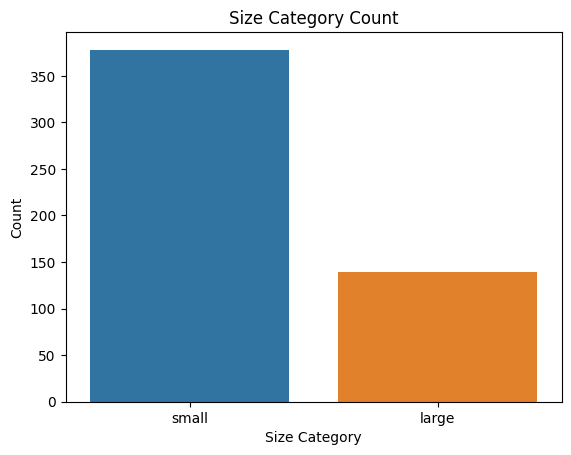

In [28]:
# plot the target variable and check the class
sns.countplot(x='size_category', data=data)

# Add title and labels
plt.title('Size Category Count')
plt.xlabel('Size Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [129]:
for i in data.columns:
  null_value=data[i].isna().unique()
#checkinthe the null value of all columns

In [30]:
null_value

array([False])

In [130]:
data.duplicated().value_counts()
#checking the duplicates

False    509
True       8
dtype: int64

In [131]:
 df=data.drop_duplicates()
 #drop the duplicates and store the cleaned data into new variable

In [35]:
df.shape

(509, 31)

In [37]:
df.drop(columns=["day","month"],inplace=True)

<ipython-input-37-efc10b0f145a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["day","month"],inplace=True)


In [38]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [41]:
x= df.iloc[:,0:-1]

In [42]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
y = df.iloc[:,-1]

In [44]:
y[:3]

0    small
1    small
2    small
Name: size_category, dtype: object

In [45]:
category_mapping = {'small': 0, 'large': 1}
y = y.map(category_mapping)
#convert categerical into numerical class using mapping technic

In [46]:
y.unique()

array([0, 1])

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

Create the Model


In [132]:
model = SVC(kernel="linear")
# support vector machine Classifier
#kernal = linear its a hyperparameter


In [133]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [134]:
metrics.accuracy_score(y_test,model.predict(x_test))
#checking the accuracy of the model

0.9921875

In [135]:
vec=model.support_vectors_
vec[:3]
# support vectors These are the data points from the training set that are closest to the decision boundary.

array([[ 93.7 , 231.1 , 715.1 ,   8.4 ,  26.9 ,  31.  ,   3.6 ,   0.  ,
          4.96,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [ 84.6 ,  26.4 , 352.  ,   2.  ,   5.1 ,  61.  ,   4.9 ,   0.  ,
          5.38,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [ 92.4 , 124.1 , 680.7 ,   8.5 ,  23.9 ,  32.  ,   6.7 ,   0.  ,
          5.33,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   1.  ]])

<ipython-input-136-8bf0e45b592c>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'k--',color="r")
<ipython-input-136-8bf0e45b592c>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy, 'k--',color="r")


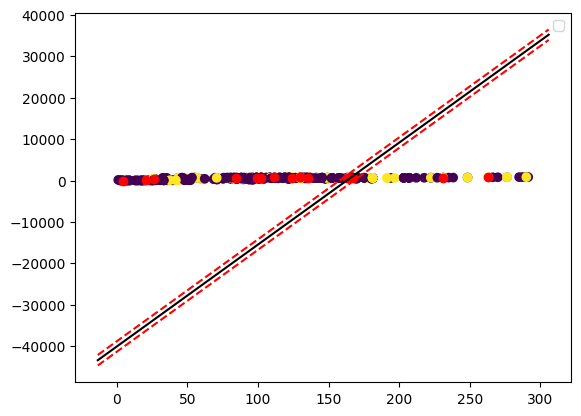

In [136]:
# This line creates a scatter plot of the training data.
# It uses the first and second features of the training data (X_train).
# The 'c=y_train' argument specifies the color of each point based on its class label.
plt.scatter(x_train.iloc[:,1], x_train.iloc[:, 2], c=y_train)
# This line plots the support vectors.
# 'vec' contains the support vectors found by the SVM model.
# They are shown in red.
plt.scatter(vec[:, 1], vec[:, 2], color="red")
# This line gets the current axes for further customization.
ax = plt.gca()
# These lines extract the x-axis limits.
xlim = ax.get_xlim()
# This line extracts the weight vector and computes the slope of the decision boundary.
w = model.coef_[0]
a = -w[0] / w[1]
# This line generates a series of x-values for plotting the decision boundary.
xx = np.linspace(xlim[0], xlim[1])
# This line computes the corresponding y-values for the decision boundary.
yy = a * xx - model.intercept_[0] / w[1]
# This line plots the decision boundary.
plt.plot(xx, yy,color="black")
# These lines plot the margins. They represent the region where the SVM classifies with high confidence.
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--',color="r")
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--',color="r")
# This line adds a legend to the plot.
plt.legend(loc="best")



Model Evaluation

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [137]:
print(classification_report(y_test,model.predict(x_test)))
# the data set is imbalanced so accuracy score  is not enough to evaluate the model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.97      1.00      0.99        33

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [138]:
cm = confusion_matrix(y_test,model.predict(x_test))
#create the confusion matrix

In [139]:
cm

array([[94,  1],
       [ 0, 33]])

Text(50.722222222222214, 0.5, 'Actual Class')

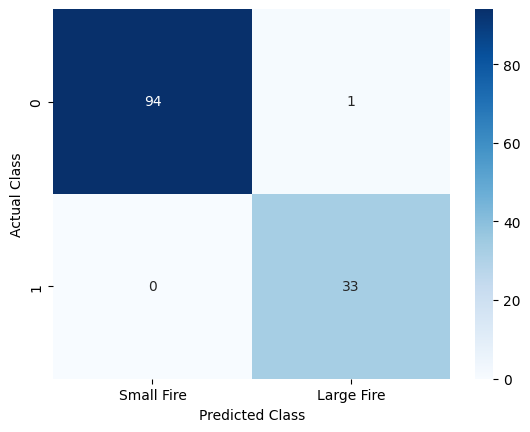

In [140]:
#visuvalazation of confusion matrix
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["Small Fire","Large Fire"])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")


In [141]:
# the model accuracy , f1_score ,Recall,Precision is good
# Model is good for prediction